# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data, 'train.p', 'valid.p', 'test.p', downloaded from
# https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
import pickle
import collections
import random, math
import uuid, os

# TODO: Fill this in based on where you saved the training and testing data
training_file   = 'train.p'
validation_file = 'valid.p'
testing_file    = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('X_train shape: ', X_train.shape)
print('X_valid shape: ', X_valid.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (34799, 32, 32, 3)
X_valid shape:  (4410, 32, 32, 3)
X_test shape:  (12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 

### Provide a Basic Summary of the Data Set

In [2]:
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

# Read csvFile into a dictionary.
# Dictionary key is ClassId. 
# Dictionary value is SignName corresponding to ClassId.
def readSignNames(csvFile):
    import csv
    labelDict = {}
    with open(csvFile, newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        for row in reader:
            labelDict[int(row['ClassId'])] = row['SignName']
    return labelDict

signDict =  readSignNames('signnames.csv')
signNames = [signDict[x] for x in range(n_classes)] 

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test   = shuffle(X_test, y_test)

def visualizeImageClasses(images, labels, title='Image classes visualization', nrows=9, ncols=5):
    yCounter  = collections.Counter(labels)
    yCounts = [yCounter[x] for x in range(n_classes)]
    classData = []    
    for i in range(n_classes):
        data = (i, yCounts[i], np.where(labels == i)[0][0])
        classData.append(data)
        
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16), gridspec_kw={'hspace': 1})
    fig.suptitle(title)    
    for i in range(n_classes):
        data = classData[i]    
        row = i // ncols
        col = i % ncols
        
        label = signDict[data[0]][:30] + ": (" + str(data[0]) + ", " + str(data[1]) + ")"
        img = images[data[2]]
        ax[row, col].imshow(img)
        ax[row, col].set_title(label, fontsize=8)

#### Visualizing 43 classes of traffic signs
- Plot 43 distintive traffic signs
- On each sign plot the title consisting of sign name, sign class id, number of training examples for each class
- The title format is:  **Sign name: (x, y)**
    - x is the sign class id 
    - y is the count of training example for class x

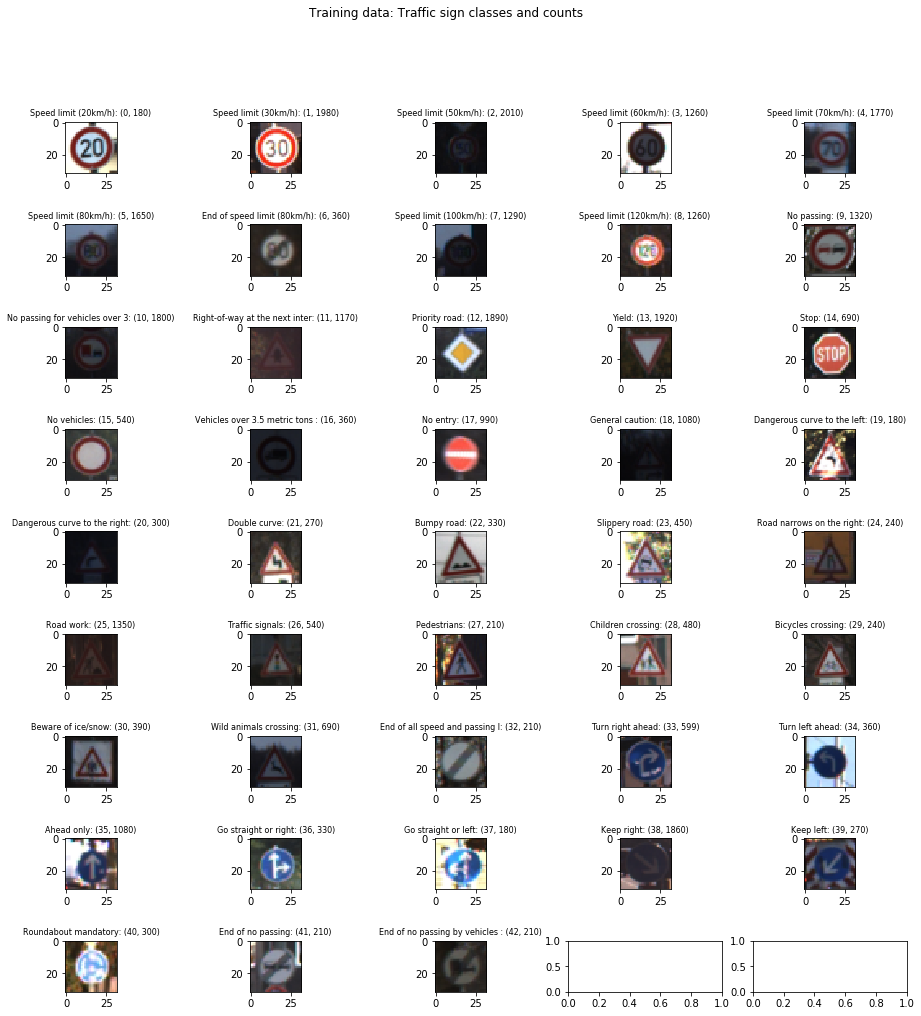

In [4]:
visualizeImageClasses(X_train, y_train, 'Training data: Traffic sign classes and counts')

#### Visualizing random traffic signs from training, and test set
- Call `visualizeDataset()` function to draw random traffic signs
    - From training set 
    - From test set

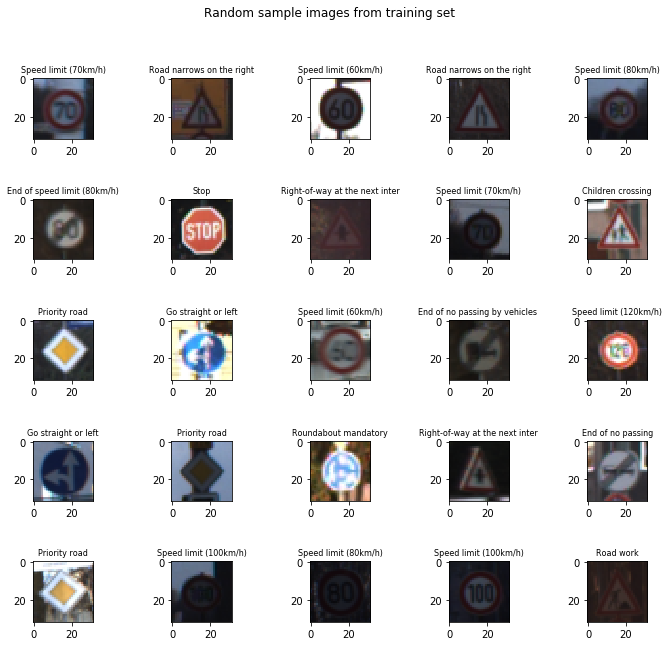

In [5]:
def visualizeDataset(images, labels, title='Sample traffic signs', nrows=5, ncols=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10), gridspec_kw={'hspace': 1})
    fig.suptitle(title)
    for i in range(nrows):
        for j in range(ncols):
            idx = i*ncols+j
            img = images[idx]
            label = signDict[labels[idx]][:30]
            ax[i, j].imshow(img)
            ax[i, j].set_title(label, fontsize=8)
            
visualizeDataset(X_train, y_train, 'Random sample images from training set')

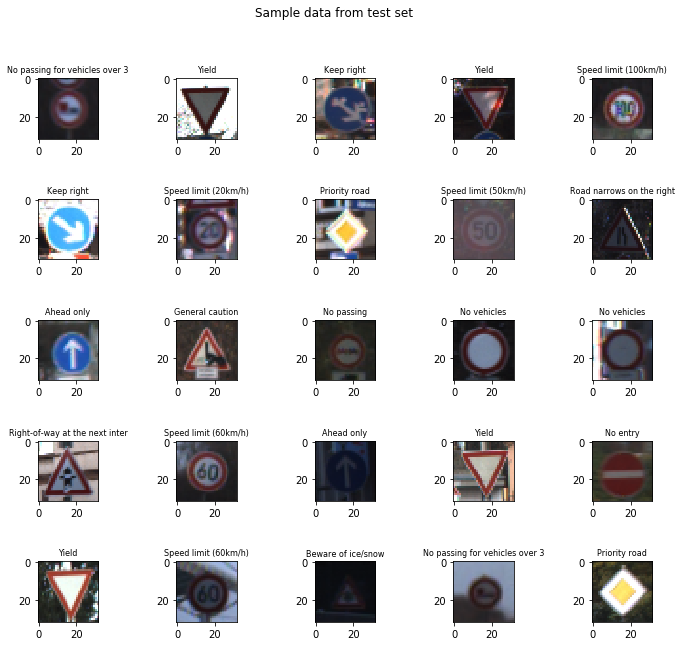

In [6]:
visualizeDataset(X_test, y_test, 'Sample data from test set')

####  Plot the count of each trafic sign class

- Call `visualizeClassCounts()` function visualize traffic sign class counts
- Use bar graph to display the counts 
- Call  `printClassLabels()` to print class labels below the bar graph.

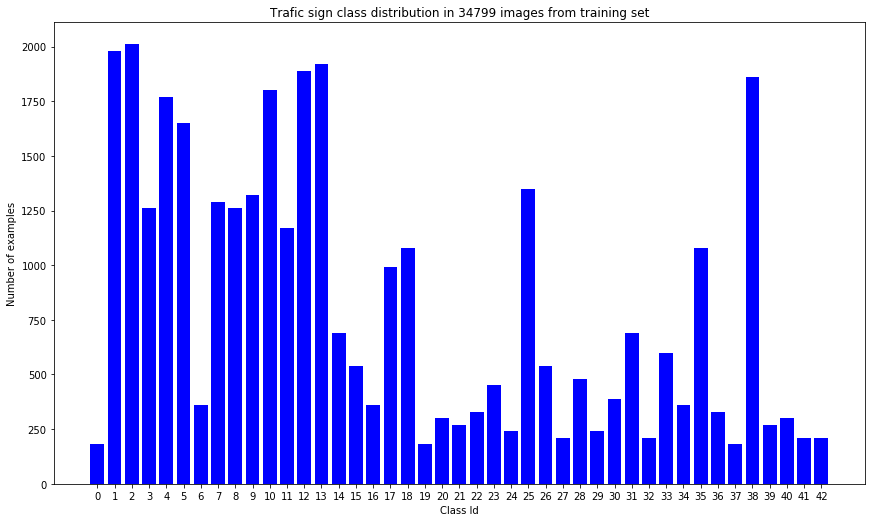

In [7]:
def visualizeClassCounts(labels, title):
    xs = np.arange(len(signNames))
    yCounter  = collections.Counter(labels)
    yCounts = [yCounter[x] for x in range(n_classes)]

    fig, ax = plt.subplots(figsize=(12, 7))
    fig.tight_layout()
    ax.bar(xs, yCounts, align='center',color='blue')
    ax.set_xticks(xs)
    ax.set_xlabel('Class Id')
    ax.set_ylabel('Number of examples')
    ax.set_title(title)
    plt.show()
    
def printClassLabels():
    print("Id: Class Name")
    for i in range(n_classes):
        print("{:>2}: {:<45}".format(i, signNames[i][:40]), end='')
        if i % 2 == 1:
            print()

visualizeClassCounts(y_train, 'Trafic sign class distribution in {} images from training set'.format(n_train))

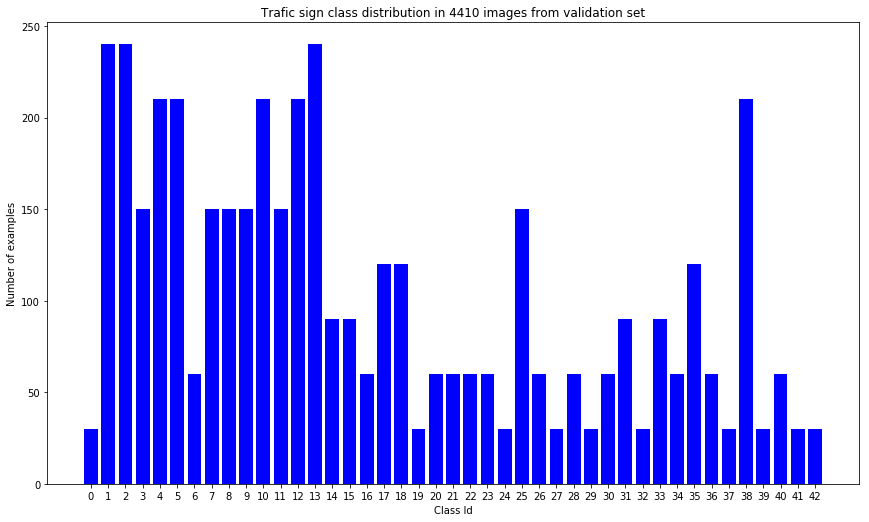

In [8]:
visualizeClassCounts(y_valid, 'Trafic sign class distribution in {} images from validation set'.format(n_validation))

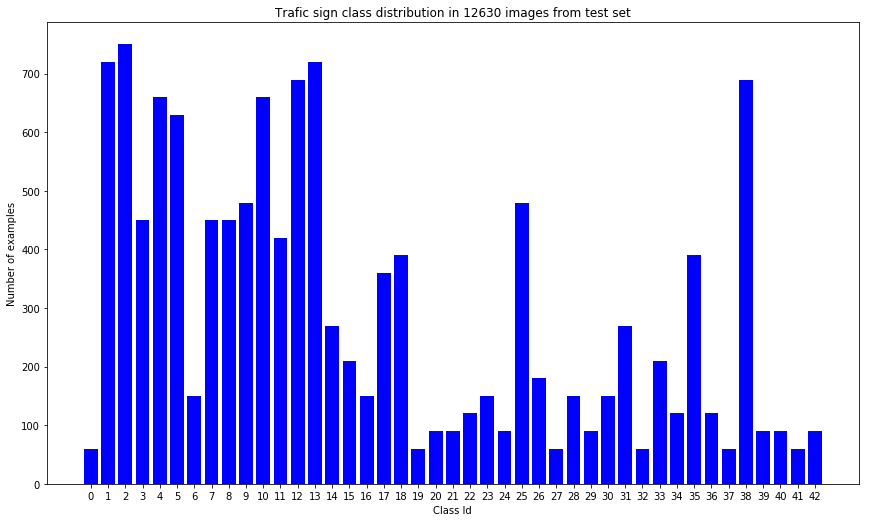

Id: Class Name
 0: Speed limit (20km/h)                          1: Speed limit (30km/h)                         
 2: Speed limit (50km/h)                          3: Speed limit (60km/h)                         
 4: Speed limit (70km/h)                          5: Speed limit (80km/h)                         
 6: End of speed limit (80km/h)                   7: Speed limit (100km/h)                        
 8: Speed limit (120km/h)                         9: No passing                                   
10: No passing for vehicles over 3.5 metric      11: Right-of-way at the next intersection        
12: Priority road                                13: Yield                                        
14: Stop                                         15: No vehicles                                  
16: Vehicles over 3.5 metric tons prohibited     17: No entry                                     
18: General caution                              19: Dangerous curve to the left              

In [9]:
visualizeClassCounts(y_test, 'Trafic sign class distribution in {} images from test set'.format(n_test))
printClassLabels()


## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set


In [10]:
### Preprocess the data . 
### Normalize the data. 
### Other preprocessing steps include:
###  1. Shuffle data to ensure randomization
###  2. Converting to grayscale, etc
###  3. Data augmentation for 'low-training-examples' classes

# Proximately normalize the data
# X_train = X_train / 255.0 - 0.5
# X_valid = X_valid / 255.0 - 0.5
# X_test =  X_test / 255.0 - 0.5

X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test =  X_test / 255.0

# Shuffle data to make sure 
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test,  y_test  = shuffle(X_test, y_test)

In [11]:
def rgb2gray(rgb):
    gray = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return gray[..., np.newaxis]

if X_train.shape[1:] == (32, 32, 3):
    # Convert to scalescale
    # X_train = rgb2gray(X_train)
    # X_valid = rgb2gray(X_valid)
    # X_test = rgb2gray(X_test)
    pass

# assert(X_train.shape[1:] == (32, 32, 1))
assert(X_train.shape[1:] == (32, 32, 3))

In [12]:
def augmentData(trainImages, trainLabels, n_classes, requiredCount):
    """Duplicate data to augment for those classes having less than requiredCount images
    
    Args:
        trainImages:   training images
        trainLabels:   training class ids
        n_classes:     number of classes 
        requiredCount: number of required training images 

    Returns:
        Return extra images for training data augmentation.
    """

    oldIds = {}
    newIds = {}
    yCounter  = collections.Counter(trainLabels)
    yCounts = [yCounter[x] for x in range(n_classes)]
    for i in range(n_classes):
        if yCounts[i] < requiredCount:
            oldIds[i] = np.where(trainLabels == i)[0]
            newIds[i] = np.array([])
            newCount = requiredCount - len(oldIds[i])            
            while len(newIds[i]) < newCount:
                genIds = np.random.choice(oldIds[i], min(len(oldIds[i]) , newCount))
                newIds[i] = np.concatenate((newIds[i], genIds), axis=None)
                
    augmentIds = np.array([], dtype=int)
    augmentY = np.array([], dtype=int)
    for c, idArray in newIds.items():
        if len(idArray) > 0:
            augmentIds = np.concatenate((augmentIds, idArray), axis=None)
            yArray = np.repeat(c, len(idArray))
            augmentY = np.concatenate((augmentY, yArray), axis=None)
    
    augmentIds = augmentIds.astype(int)
    augmentX = trainImages[augmentIds]    
    return augmentX, augmentY


# requiredCount for each class is 900 training examples
requiredCount = 900
augmentX, augmentY = augmentData(X_train, y_train, n_classes, requiredCount)

print('X_train.shape  before data concatenation {}'.format(X_train.shape))
print('augmentX.shape before data concatenation {}'.format(augmentX.shape))
X_train = np.concatenate((X_train, augmentX))
y_train = np.concatenate((y_train, augmentY))

print('X_train.shape  after data concatenation {}'.format(X_train.shape))

X_train.shape  before data concatenation (34799, 32, 32, 3)
augmentX.shape before data concatenation (16351, 32, 32, 3)
X_train.shape  after data concatenation (51150, 32, 32, 3)


### Model Architecture

The architecture of this Traffic Sign Recognition Classifier is an adaptation of the [LeNet-5](http://yann.lecun.com/exdb/lenet) convolutional neural network.

!['Model Architecture'](LeNet5.png)


The differences between this model and the LetNet-5 model is **highlighted** below. 
- The first  convolution layer uses **38** filters. LeNet-5 used 6 filters. 
- The second convolution layer uses **64** filters. LeNet-5 used 16 filters.
- The output (last) layer has **43** classes to classify traffic signs. LeNet-5 used 10 classes to recognize digits.

|Layer                            | Shape        |
|---------------------------------|:------------:|
|1.  Input                        | 32x32x3      |
|2.  Convolution (valid, 5x5x38)  | 28x28x**38** |
|3.  Activation  (ReLU)           | 28x28x**38** |
|4.  Max Pooling (valid, 2x2)     | 14x14x**38** |
|5.  Convolution (valid, 5x5x16)  | 10x10x**64** |
|6.  Activation  (ReLU)           | 10x10x**64** |
|7.  Max Pooling (valid, 2x2)     | 5x5x**64**   |
|8.  Flatten                      | **1600**     |
|9.  Dense                        | 120          |
|10. Dropout     (0.5)            | 120          |
|11. Activation  (ReLU)           | 120          |
|12. Dense                        | 84           |
|13. Dropout     (0.5)            | 84           |
|14. Activation  (ReLU)           | 84           |
|15. Dense       (Logits)         |**43**        |
|16. Activation  (Softmax)        |**43**        |


In [13]:
### Model architecture implementation.
import tensorflow as tf
class LeNet5:    
    def __init__(self, channels=3, n_classes=43, mu = 0, sigma = 0.1, rate=0.001):
        def conv2d(x, W, bias, s=1, pad='VALID'):
            z = tf.nn.conv2d(x, W, strides = [1, s, s, 1], padding=pad)
            z = tf.nn.bias_add(z, bias)
            z = tf.nn.relu(z)
            return z

        def maxpool2d(x, k=2, s=2, pad='VALID'):
            pool = tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, s, s, 1], padding=pad)
            return pool
        
        K1 = 38
        K2 = 64
        FCK1 = 120
        FCK2 = 84
        
        self.x = tf.placeholder(tf.float32, (None, 32, 32, channels))
        self.y = tf.placeholder(tf.int32, (None))
        self.keep_prob = tf.placeholder(tf.float32)    
    
        # Convolutional layer 1. Input: 32x32xchannels. Ouuput: 28x28xK1
        w1 = tf.Variable(tf.truncated_normal([5, 5, channels, K1], mean=mu, stddev=sigma))
        b1 = tf.Variable(tf.zeros([K1]))
        conv1 = conv2d(self.x, w1, b1)

        # Input:  Input 28x28xK1. Ouuput: 14x14xK1
        pool1 = maxpool2d(conv1)

        # Convolutional layer 2. Input: 14x14xK1. Ouuput: 10x10xK2
        w2 = tf.Variable(tf.truncated_normal([5, 5, K1, K2], mean=mu, stddev=sigma))
        b2 = tf.Variable(tf.zeros([K2]))
        conv2 = conv2d(pool1, w2, b2)

        # Pooling. Input: 10x10xK2. Output: 5x5xK2.
        pool2 = maxpool2d(conv2)

        # Layer 3: Fully Connected. Input: 5x5xK2. Output: FCK1.
        fc1 = tf.reshape(pool2, [-1, 5*5*K2])
        wd1 = tf.Variable(tf.truncated_normal([5*5*K2, FCK1], mean=mu, stddev=sigma))
        bd1 = tf.Variable(tf.zeros([FCK1]))
        fc1 = tf.add(tf.matmul(fc1, wd1), bd1)
        fc1 = tf.nn.dropout(fc1, self.keep_prob)
        fc1 = tf.nn.relu(fc1)

        # Layer 4: Fully Connected. Input: FCK1. Output: FCK2
        wd2 = tf.Variable(tf.truncated_normal([FCK1, FCK2], mean=mu, stddev=sigma))
        bd2 = tf.Variable(tf.zeros([FCK2]))
        fc2 = tf.add(tf.matmul(fc1, wd2), bd2)
        fc2 = tf.nn.dropout(fc2, self.keep_prob)
        fc2 = tf.nn.relu(fc2)

        # Layer 5: Fully Connected. Input: FCK2. Output: n_classes
        wd3 = tf.Variable(tf.truncated_normal([FCK2, n_classes], mean=mu, stddev=sigma))
        bd3 = tf.Variable(tf.zeros([n_classes]))        
        self.logits = tf.add(tf.matmul(fc2, wd3), bd3)        
        self.probs  = tf.nn.softmax(self.logits)
        self.yhats = tf.argmax(self.logits, 1)

        self.one_hot_y = tf.one_hot(self.y, n_classes)        
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.one_hot_y))
        self.training = tf.train.AdamOptimizer(learning_rate = rate).minimize(self.loss)

        self.correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.sum_correct_preds = tf.reduce_sum(tf.cast(self.correct_pred, tf.float32))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_pred, tf.float32))
        self.saver = tf.train.Saver()
        
    def train(self, X_train, y_train, X_valid, y_valid, epochs = 25, batch_size=256):
        self.train_accuracies = []
        self.validation_accuracies = []
        self.epochs = epochs
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            print("Training...")
            for i in range(self.epochs):
                X_train, y_train = shuffle(X_train, y_train)
                train_correct_preds = 0
                for k in range(0, len(X_train), batch_size):
                    batch_x, batch_y = X_train[k:k+batch_size], y_train[k:k+batch_size]
                    sess.run(self.training, feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 0.5})
                    correct_preds = sess.run(self.sum_correct_preds, feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1.0})
                    train_correct_preds += correct_preds

                train_accuracy = train_correct_preds / len(X_train)
                validation_accuracy = sess.run(self.accuracy, feed_dict={self.x: X_valid, self.y: y_valid, self.keep_prob: 1.0})
                print("EPOCH {} ...".format(i+1))
                print("Training Accuracy   = {:.3f}".format(train_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
                self.train_accuracies.append(train_accuracy)
                self.validation_accuracies.append(validation_accuracy)
            
            filename = "{}".format(uuid.uuid4())
            self.modelName = os.path.join('savedModel', filename)
            self.saver.save(sess, self.modelName)
            print("Traffic sign classification Model {} saved".format(self.modelName))
            
    def plotLearningCurve(self):
        plt.figure(figsize=(10, 10))
        epochs = range(1, self.epochs+1)
        plt.plot(epochs, self.train_accuracies, label='train')
        plt.plot(epochs, self.validation_accuracies, label='validation')
        plt.title('Training and Validation Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epochs')
        plt.xticks(epochs)
        plt.legend(loc='center right')
    
    def evaluate(self, X_test, y_test, k=3):
        with tf.Session() as sess:
            self.saver.restore(sess, self.modelName)            
            test_accuracy = sess.run(self.accuracy, feed_dict={self.x: X_test, self.y: y_test, self.keep_prob: 1.0})
            
            topk = tf.nn.top_k(self.probs, k)
            pred_probs, pred_classes = sess.run(topk, feed_dict={self.x: X_test, self.y: y_test, self.keep_prob: 1.0})
            
            yhats = sess.run(self.yhats, feed_dict={self.x: X_test, self.y: y_test, self.keep_prob: 1.0})
                        
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            return test_accuracy, yhats, pred_probs, pred_classes

    def predict(self, X_test, k=3):
        with tf.Session() as sess:
            self.saver.restore(sess, self.modelName)
            topk = tf.nn.top_k(self.probs, k)
            pred_probs, pred_classes = sess.run(topk, feed_dict={self.x: X_test, self.keep_prob: 1.0})
            yhats = sess.run(self.yhats, feed_dict={self.x: X_test, self.keep_prob: 1.0})
            return yhats, pred_probs, pred_classes
        

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model 
### Print out the accuracy on the training and validation set.
model = LeNet5()
model.train(X_train, y_train, X_valid, y_valid, epochs = 25)

Training...
EPOCH 1 ...
Training Accuracy   = 0.269
Validation Accuracy = 0.504

EPOCH 2 ...
Training Accuracy   = 0.751
Validation Accuracy = 0.804

EPOCH 3 ...
Training Accuracy   = 0.919
Validation Accuracy = 0.901

EPOCH 4 ...
Training Accuracy   = 0.958
Validation Accuracy = 0.923

EPOCH 5 ...
Training Accuracy   = 0.976
Validation Accuracy = 0.958

EPOCH 6 ...
Training Accuracy   = 0.983
Validation Accuracy = 0.959

EPOCH 7 ...
Training Accuracy   = 0.988
Validation Accuracy = 0.965

EPOCH 8 ...
Training Accuracy   = 0.990
Validation Accuracy = 0.966

EPOCH 9 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.970

EPOCH 10 ...
Training Accuracy   = 0.994
Validation Accuracy = 0.969

EPOCH 11 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.972

EPOCH 12 ...
Training Accuracy   = 0.996
Validation Accuracy = 0.975

EPOCH 13 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.978

EPOCH 14 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.979

EPOCH 15 ...
Trai

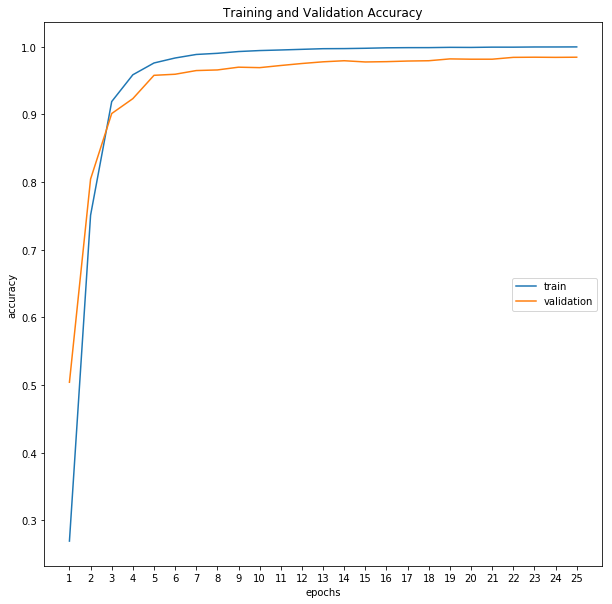

In [15]:
### Plot the learning curve showing training and validation accuracy graph
model.plotLearningCurve()

### Visualizing the quality of The Traffic Sign Recognition Classifier
- Compute the global (average) Test Accuracy Number 
- Call `sklearn.metrics.classification_report` function to print out precision, recall and f1-score classification metrics.
    - **Precision:** aka positive predictive value, is the fraction  $ \frac{true \ positives} {true \ positives + false \ positives} $   
    - **Recall:** aka sensitivity, is the fraction  $ \frac{true \ positives} {true \ positives + false \ nagatives} $   
    - **F1-score:** aka F-measure, is a measure of a test's accuracy. F-score is the harmonic mean of the precision and recall.
    - **F-measure**  $ = 2*\frac{Precision*Recall}{Precision + Recall}  = \frac{true \ positives} {true \ positives + \frac{1}{2} (false \ positives + false \ negatives )} $
    - **Support:** Number of test images

In [ ]:
# Compute and Print out The Test Accuracy Number 
test_accuracy, yhats, pred_probs, pred_classes = model.evaluate(X_test, y_test)

INFO:tensorflow:Restoring parameters from savedModel/d92066cb-6480-4fb3-886d-fdd41cdebd96


In [ ]:
from sklearn.metrics import classification_report
target_names = ['{:>2} {:50}'.format(i, signNames[i]) for i in range(n_classes)]
print(classification_report(y_test, yhats, target_names=target_names))

---

## Step 3: Test the Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

Nine pictures below are downloaded from:
- https://www.autoeurope.com/travel-guides/germany/germany-road-signs
- Berlin street view using map.google.com
- https://github.com/hparik11/German-Traffic-Sign-Recognition/blob/master/my_sign_images

### Load and Output the Images

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualizeNewImages(imgFiles, classIds=None, title='New images', rows=3, cols=3):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12), gridspec_kw={'hspace': 1})
    fig.suptitle(title)
    
    i = 0
    for imgFile in imgFiles:
        img = mpimg.imread(imgFile)
        
        # Remove the last alpha channel
        img = img[:,:,:3]        
        ax[i//rows, i%cols].imshow(img)
        if classIds is not None:
            classId = classIds[i]
            label = signDict[classId][:40]
            ax[i//rows, i%cols].set_title(label, fontsize=8)            
        i +=1

trueClasses = np.array([23, 14, 36, 17, 27, 25, 40, 13, 34])
visualizeNewImages(glob.glob('newImages/*.*'), trueClasses, title='New images with true labels')

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

import cv2 
def resizeImages(imgFiles, newSize=(32, 32)):
    images = []
    for imgFile in imgFiles:
        img = mpimg.imread(imgFile)
        img = cv2.resize(img, newSize)
        img = img[:,:,:3]
        img = np.expand_dims(img, axis=0)
        images.append(img)        
    return np.concatenate(images)

newImages = resizeImages(glob.glob('newImages/*.*'))
yhats, pred_probs, pred_classes = model.predict(newImages, k =5)
visualizeNewImages(glob.glob('newImages/*.*'), yhats, 'predictions for new images')

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 9 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

newTestAccuracy = np.sum(yhats == trueClasses) / len(trueClasses)
print('The accuracy for these 9 new images is {:.3f}'.format(newTestAccuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=5, for each sign, it'll return the 5 largest probabilities (out of a possible 43) and the correspoding class ids.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web.

def visualizeSoftmaxProbabilities(xs, yhats, ys, pred_classes, probs, figSize=(20, 30)):
    plt.figure(figsize=figSize)
    for i in range(len(xs)):
        actualId    = ys[i]
        predictedId = yhats[i]
        plt.subplot(len(xs), 2, 2*i+1)
        plt.imshow(xs[i])    
        plt.title("Predicted:  {} // Actual: {}".format(signDict[predictedId], signDict[actualId]))
        plt.axis('off')
        plt.subplot(len(xs), 2, 2*i+2)
        plt.barh(np.arange(1, 6, 1), probs[i, :])
        labels = [signDict[k] for k in pred_classes[i]]
        plt.yticks(np.arange(1, 6, 1), labels)
    plt.show()

visualizeSoftmaxProbabilities(newImages, yhats, trueClasses, pred_classes, pred_probs)